# DASK

## Importar las librerias adecuadas.

In [90]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import dask.dataframe as dd
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder

## Leer los CSV:

In [60]:
# Ingesta de datos
bloques = 10
df_application = dd.read_csv(r'C:\Users\carpa\OneDrive\Documents\Cursos\UTEC Computer Science\Ciclo 2\Big Data\Credit Scoring\application_record.csv')

df_record = dd.read_csv(r'C:\Users\carpa\OneDrive\Documents\Cursos\UTEC Computer Science\Ciclo 2\Big Data\Credit Scoring\credit_record.csv')

In [55]:
# Data Exploration in dt_ap

df_application.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


# Cambiar variables categoricas

In [45]:
# Explorar valores unicos
list_non_value = ["CODE_GENDER","FLAG_OWN_CAR","FLAG_OWN_REALTY","NAME_INCOME_TYPE","NAME_EDUCATION_TYPE","NAME_FAMILY_STATUS",
                  "NAME_HOUSING_TYPE","OCCUPATION_TYPE"]
for column in list_non_value:
    print(column, df_application.compute()[column].unique())

CODE_GENDER ['M' 'F']
FLAG_OWN_CAR ['Y' 'N']
FLAG_OWN_REALTY ['Y' 'N']
NAME_INCOME_TYPE ['Working' 'Commercial associate' 'Pensioner' 'State servant' 'Student']
NAME_EDUCATION_TYPE ['Higher education' 'Secondary / secondary special' 'Incomplete higher'
 'Lower secondary' 'Academic degree']
NAME_FAMILY_STATUS ['Civil marriage' 'Married' 'Single / not married' 'Separated' 'Widow']
NAME_HOUSING_TYPE ['Rented apartment' 'House / apartment' 'Municipal apartment'
 'With parents' 'Co-op apartment' 'Office apartment']
OCCUPATION_TYPE [nan 'Security staff' 'Sales staff' 'Accountants' 'Laborers' 'Managers'
 'Drivers' 'Core staff' 'High skill tech staff' 'Cleaning staff'
 'Private service staff' 'Cooking staff' 'Low-skill Laborers'
 'Medicine staff' 'Secretaries' 'Waiters/barmen staff' 'HR staff'
 'Realty agents' 'IT staff']


In [46]:
# Remapping Non Numeric Values:

gender = {'M':1, 'F':2}
car = {'Y':1, 'N':0}
realty = {'Y':1, 'N':0}
income = {'Working':1, 'Commercial associate':2, 'Pensioner':3, 'State servant':4, 'Student':5}
education = {'Higher education':1, 'Secondary / secondary special':2, 'Incomplete higher':3,
 'Lower secondary':4, 'Academic degree':5}
family = {'Civil marriage':1, 'Married':2, 'Single / not married':3, 'Separated':4, 'Widow':5}
house = {'Rented apartment':1, 'House / apartment':2, 'Municipal apartment':3,
 'With parents':4, 'Co-op apartment':5, 'Office apartment':6}
occup = {'Security staff':1, 'Sales staff':2, 'Accountants':3, 'Laborers':4, 'Managers':5,
 'Drivers':6, 'Core staff':7, 'High skill tech staff':8, 'Cleaning staff':9,
 'Private service staff':10, 'Cooking staff':11, 'Low-skill Laborers':12,
 'Medicine staff':13, 'Secretaries':14, 'Waiters/barmen staff':15, 'HR staff':16,
 'Realty agents':17, 'IT staff':18}


In [49]:
df_application.compute().replace({'CODE_GENDER':gender,'FLAG_OWN_CAR':car,'FLAG_OWN_REALTY':realty,
                         'NAME_INCOME_TYPE':income,'NAME_EDUCATION_TYPE':education,
                         'NAME_FAMILY_STATUS':family,'NAME_HOUSING_TYPE':house,
                         'OCCUPATION_TYPE':occup},inplace=True)
#dt_ap["CODE_GENDER"].compute().map(gender)
#dt_ap["CAR"]= dt_ap["FLAG_OWN_CAR"].compute().map(car)
#dt_ap["REALTY"]= dt_ap["FLAG_OWN_REALTY"].compute().map(realty)
#dt_ap["INCOME"] = dt_ap["NAME_INCOME_TYPE"].compute().map(income)
#dt_ap["EDUCATION"] = dt_ap["NAME_EDUCATION_TYPE"].compute().map(education)
#dt_ap["FAMILY"] = dt_ap["NAME_FAMILY_STATUS"].compute().map(family)
#dt_ap["HOUSING"] = dt_ap["NAME_HOUSING_TYPE"].compute().map(house)
#dt_ap["OCCUPATION"] = dt_ap["OCCUPATION_TYPE"].compute().map(occup).fillna(0)

In [51]:
df_application.head()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
ID,,,,,,,,,,,,,,,,,
5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


Pre - procesamiento

In [56]:
# Análisis de valores duplicados
## Id's únicos dentro del dataframe df_application
%time
print("Cantidad de registros dentro de df_data:",df_application.compute().shape[0])
print("Cantidad de id's únicos dentro de df_data",df_application['ID'].nunique().compute())
## NO coincide la cantidad de registros únicos con la cantidad de registros dentro
## del dataframe

Cantidad de registros dentro de df_data: 438557
Cantidad de id's únicos dentro de df_data 438510


In [57]:
## Los valores duplicados dentro del dataset serán eliminados
df_application = df_application.drop_duplicates('ID', keep='last').compute() 

In [62]:
## Id's únicos dentro del dataframe df_record
%time
print("Cantidad de registros dentro de df_record:",df_record.compute().shape[0])
print("Cantidad de id's únicos dentro de df_record",df_record['ID'].nunique().compute())
# NO coincide la cantidad de registros únicos con la cantidad de registros dentro
# porque son datos mensuales

Cantidad de registros dentro de df_record: 1048575
Cantidad de id's únicos dentro de df_record 45985


In [63]:
## Número de id's que las dos tables comparten
%time
print(len(set(df_application["ID"].compute()).intersection(set(df_record["ID"].compute()))))

36457


In [64]:
# Análisis de valores nulos df_application
%time
print("-----------Análisis de valores nulos df_application-------------------")
print(df_application.isnull().sum().compute())

Wall time: 0 ns
-----------Análisis de valores nulos df_application-------------------
ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        134203
CNT_FAM_MEMBERS             0
dtype: int64


In [ ]:
# El campo OCCUPATION_TYPE tiene gran cantidad de valores nulos
# no se tomará en cuenta este campo por dicha razón
df_application.drop('OCCUPATION_TYPE', axis=1, inplace=True) 

In [65]:
# Análisis de valores nulos df_record
%time
print("-----------Análisis de valores nulos df_record-------------------")
print(df_record.isnull().sum().compute())

Wall time: 0 ns
-----------Análisis de valores nulos df_record-------------------
ID                0
MONTHS_BALANCE    0
STATUS            0
dtype: int64


In [71]:
# Unificación de las dos tablas
%time
#union = pd.merge(df_application, df_record, on="ID")
union = dd.from_pandas(df_application.join(df_record.set_index('ID').compute(), on='ID', how='inner').compute(),npartitions=100)
union.compute().info()

Wall time: 0 ns
<class 'pandas.core.frame.DataFrame'>
Int64Index: 777715 entries, 0 to 434812
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   777715 non-null  int64  
 1   CODE_GENDER          777715 non-null  object 
 2   FLAG_OWN_CAR         777715 non-null  object 
 3   FLAG_OWN_REALTY      777715 non-null  object 
 4   CNT_CHILDREN         777715 non-null  int64  
 5   AMT_INCOME_TOTAL     777715 non-null  float64
 6   NAME_INCOME_TYPE     777715 non-null  object 
 7   NAME_EDUCATION_TYPE  777715 non-null  object 
 8   NAME_FAMILY_STATUS   777715 non-null  object 
 9   NAME_HOUSING_TYPE    777715 non-null  object 
 10  DAYS_BIRTH           777715 non-null  int64  
 11  DAYS_EMPLOYED        777715 non-null  int64  
 12  FLAG_MOBIL           777715 non-null  int64  
 13  FLAG_WORK_PHONE      777715 non-null  int64  
 14  FLAG_PHONE           777715 non-null  int64  
 15  F

In [72]:
type(union)

dask.dataframe.core.DataFrame

In [ ]:
# Eliminación de columnas que no se usarán para el análisis
union.drop(columns=['FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL'], inplace=True)

In [73]:
%time
union.head()

Wall time: 0 ns


,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,0,C
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-1,C
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-2,C
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-3,C
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-4,C


Wall time: 0 ns
El 69% no tiene un vehículo


<AxesSubplot:ylabel='FLAG_OWN_CAR'>

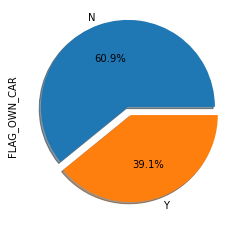

In [75]:
%time
print("El 69% no tiene un vehículo")
union['FLAG_OWN_CAR'].value_counts().compute().plot(kind='pie', explode=(0.1,0), shadow=True, autopct='%1.1f%%')

Wall time: 0 ns
Del total el 66.7% son mujeres


<AxesSubplot:ylabel='CODE_GENDER'>

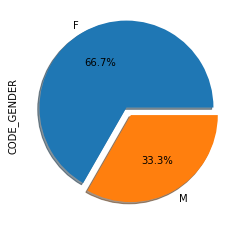

In [76]:
%time
print("Del total el 66.7% son mujeres")
union['CODE_GENDER'].value_counts().compute().plot(kind='pie', explode=(0.1,0), shadow=True, autopct='%1.1f%%')

In [77]:
%time
print("La mayoría no tiene hijos")
union['CNT_CHILDREN'].value_counts().compute()

Wall time: 515 µs
La mayoría no tiene hijos


0     540639
1     155638
2      70399
3       9328
4       1224
5        324
14       111
7         46
19         6
Name: CNT_CHILDREN, dtype: int64

In [78]:
%time
print("La mayoría de usuarios tiene dos familiares")
union['CNT_FAM_MEMBERS'].value_counts().compute()

Wall time: 0 ns
La mayoría de usuarios tiene dos familiares


2.0     423723
1.0     141477
3.0     134894
4.0      66990
5.0       8999
6.0       1196
7.0        273
15.0       111
9.0         46
20.0         6
Name: CNT_FAM_MEMBERS, dtype: int64

Wall time: 0 ns


<AxesSubplot:ylabel='CODE_GENDER,NAME_EDUCATION_TYPE'>

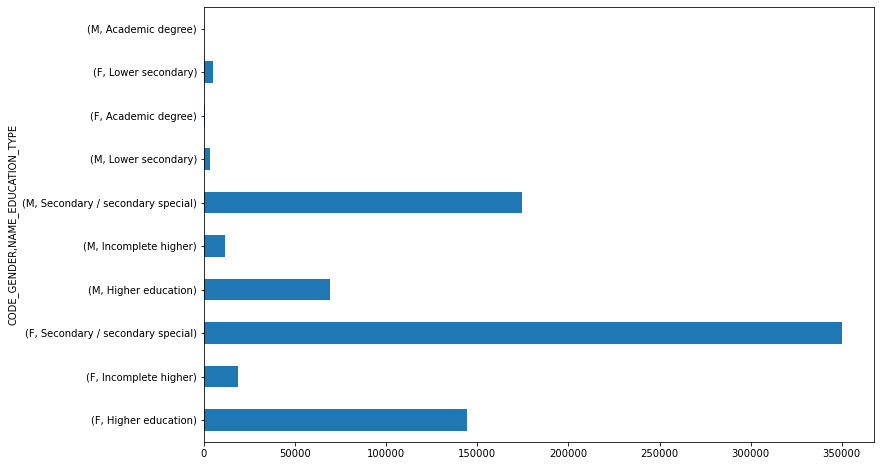

In [79]:
%time
union.groupby(['CODE_GENDER', 'NAME_EDUCATION_TYPE']).size().compute().plot(kind='barh', figsize = (12, 8))

In [86]:
## Cast de datos y eliminación de filas que contengan valores nulos
%time
union['AMT_INCOME_TOTAL'] = union['AMT_INCOME_TOTAL'].astype('int')
df_union = dd.from_pandas(union.dropna().compute(),npartitions=100)


Wall time: 0 ns


Wall time: 0 ns
Las familias que tienen dos hijos son las que mayor ingreso perciben


<AxesSubplot:ylabel='AMT_INCOME_TOTAL,CNT_FAM_MEMBERS'>

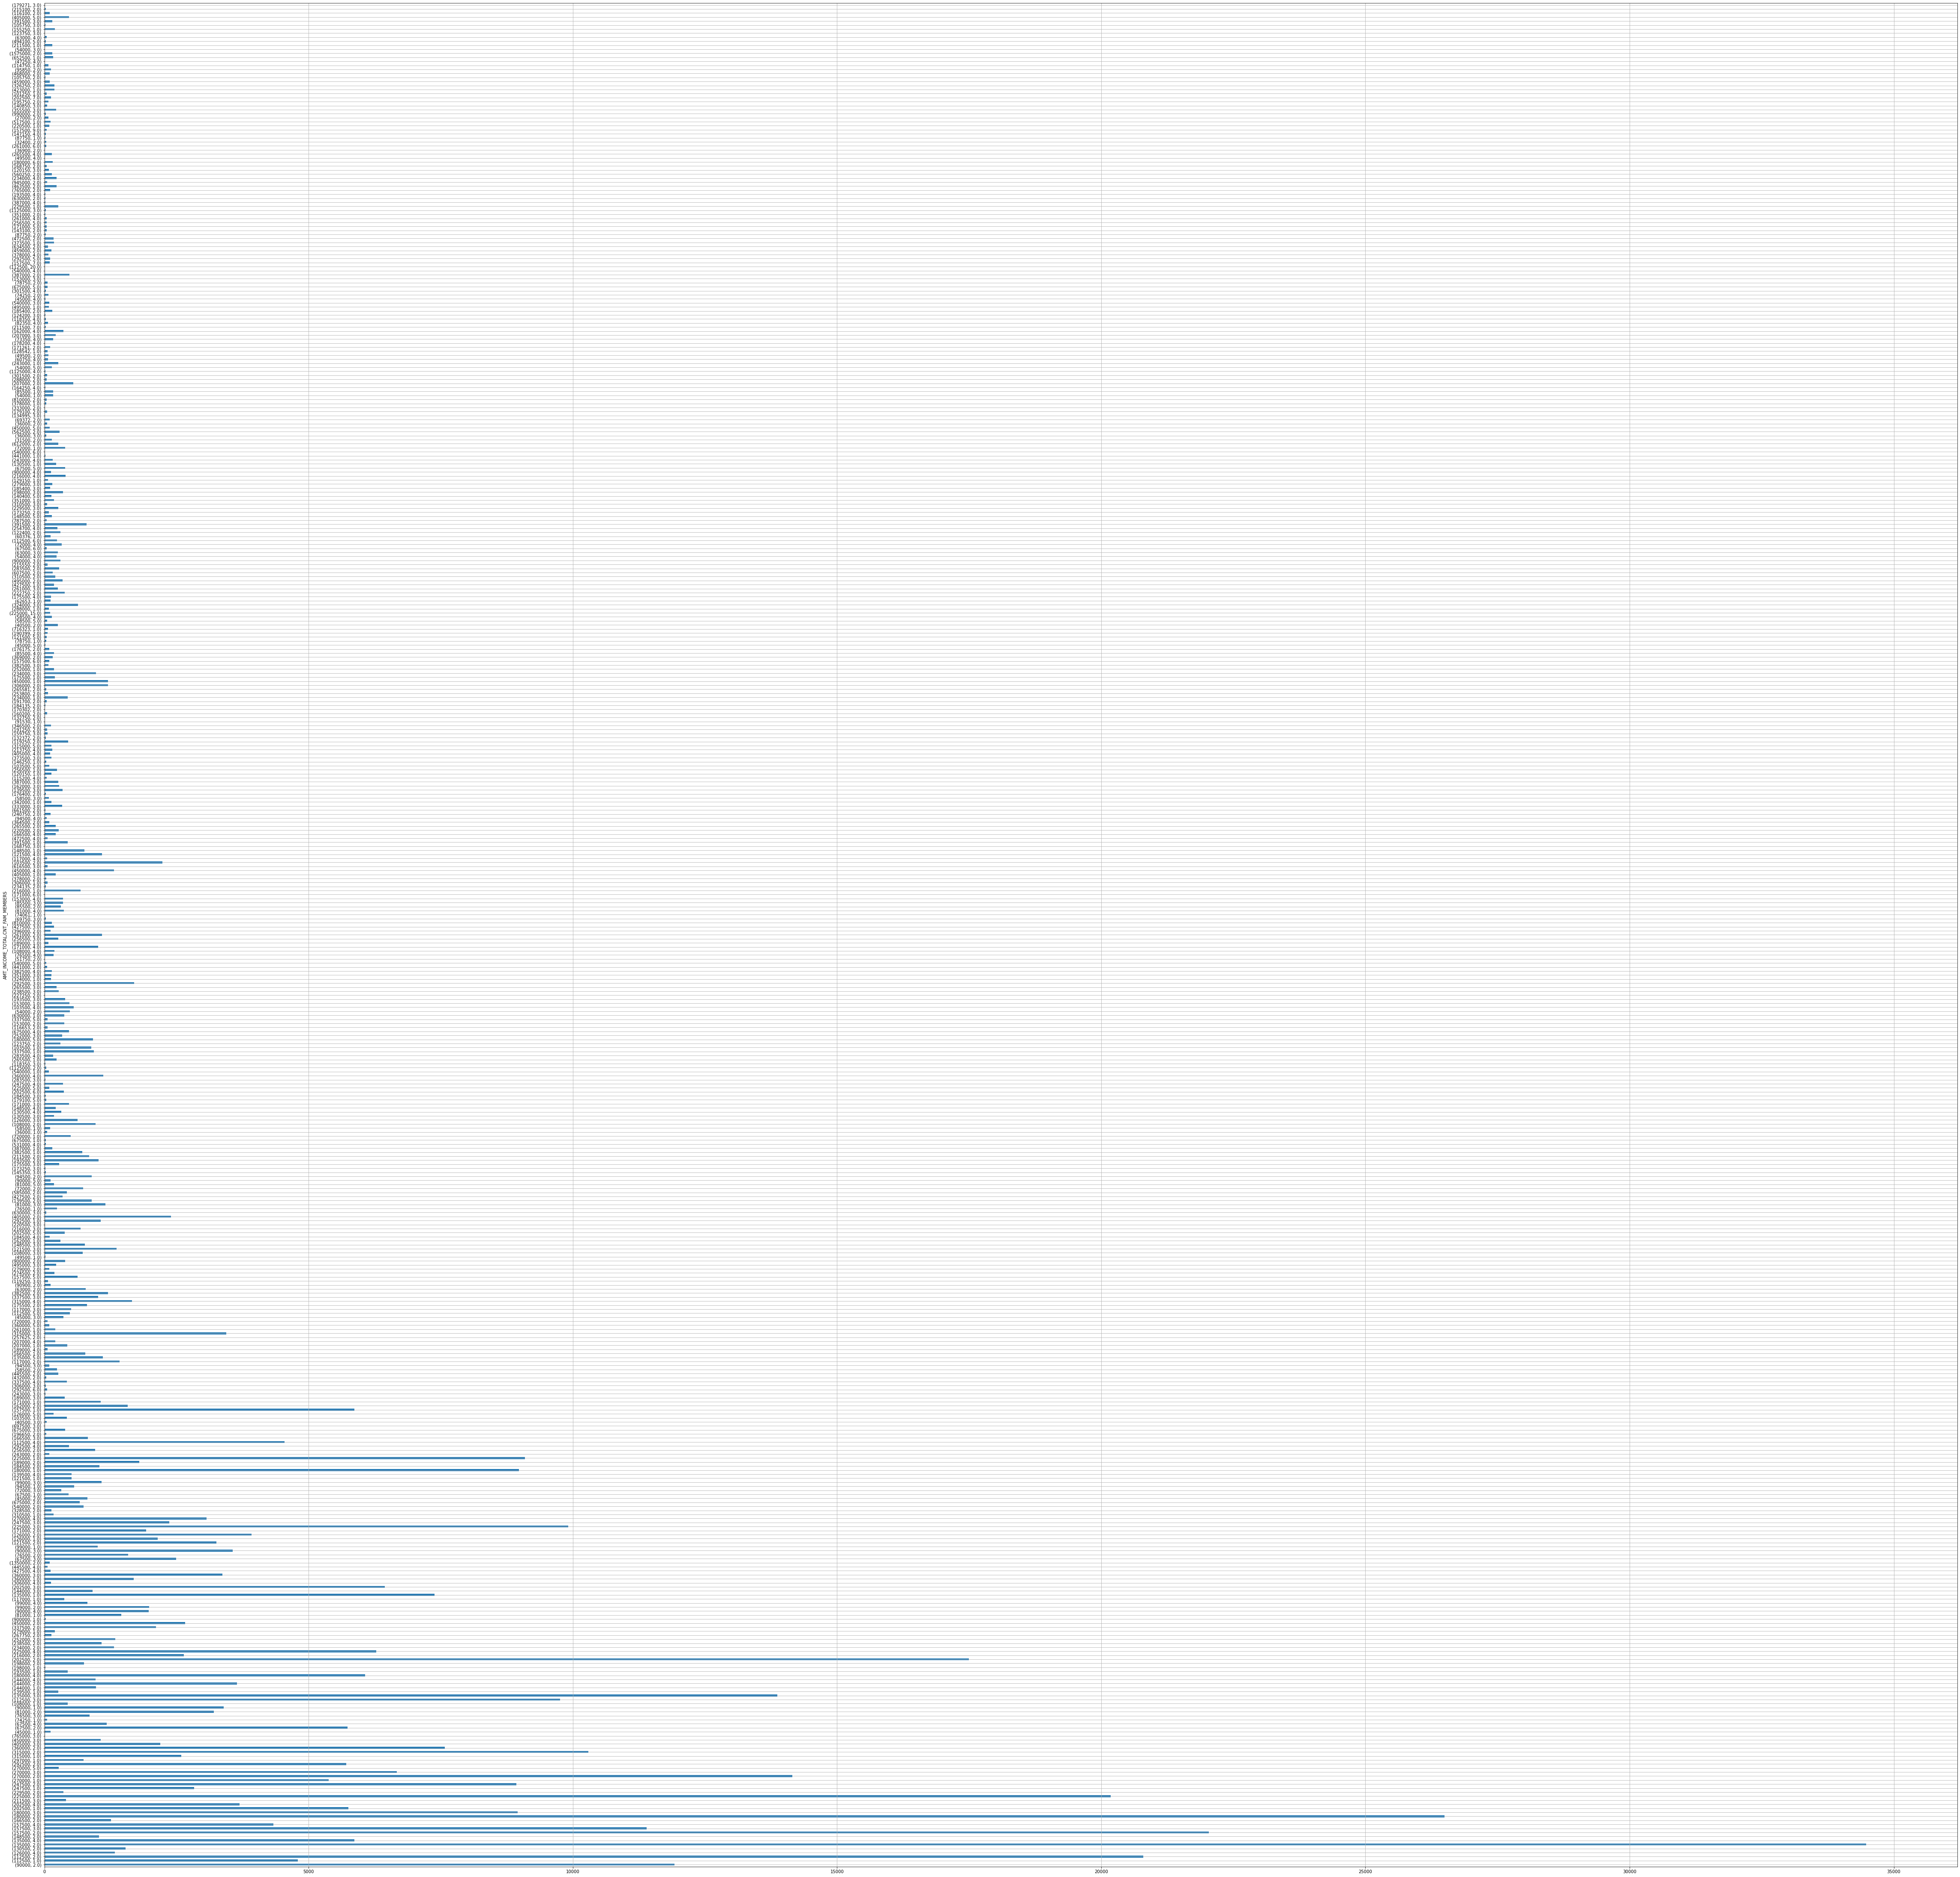

In [88]:
%time
print("Las familias que tienen dos hijos son las que mayor ingreso perciben")
df_union.groupby(['AMT_INCOME_TOTAL', 'CNT_FAM_MEMBERS']).size().compute().plot(kind='barh', figsize=(80, 80), grid=True)

In [115]:

object = df_union.select_dtypes(include=['object']).compute()

In [122]:
X = object.columns

In [121]:
x

Index(['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'OCCUPATION_TYPE', 'STATUS'],
      dtype='object')

In [126]:
%time
le = LabelEncoder()
for x in X:
    df_union[x] = le.fit_transform(df_union[x])

Wall time: 0 ns


TypeError: Column assignment doesn't support type numpy.ndarray